In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)
df['RESTAURANT'] = df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']
print df.iloc[0:10]['RESTAURANT']

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


In [5]:
print len(df['RESTAURANT'].unique())

10114


In [6]:
df_unique = df.drop_duplicates(subset = 'RESTAURANT')
mask = (df_unique['DBA'].value_counts() > 1)
print len(df_unique['DBA'].value_counts()[mask])

368


In [7]:
df_unique['DBA'].value_counts()[mask].head(20).plot(kind = 'bar')

In [8]:
print float(df_unique['DBA'].value_counts()[mask].sum())/len(df['RESTAURANT'].unique())

0.164722167293


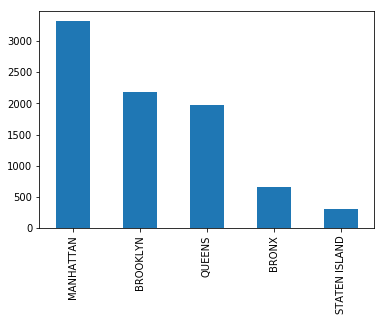

In [14]:
df_unique = df.drop_duplicates(subset = 'RESTAURANT')

df_unique.drop_duplicates(subset = 'DBA', keep = False) \
         ['BORO'].value_counts().drop(labels='Missing').plot(kind='bar')

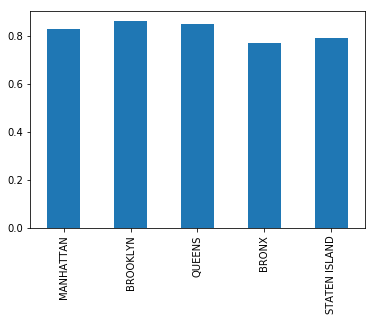

In [16]:
df_nonchain = df_unique.drop_duplicates(subset = 'DBA', keep = False) \
         ['BORO'].value_counts().drop(labels='Missing')
df_total = df_unique['BORO'].value_counts().drop(labels='Missing')
(df_nonchain/df_total).plot(kind='bar')

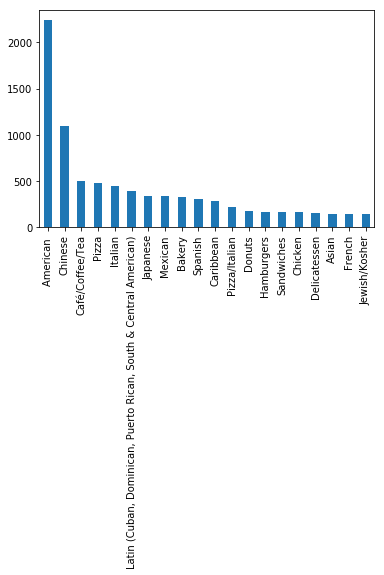

In [18]:
df_unique['CUISINE DESCRIPTION'].value_counts().head(20).plot(kind='bar')

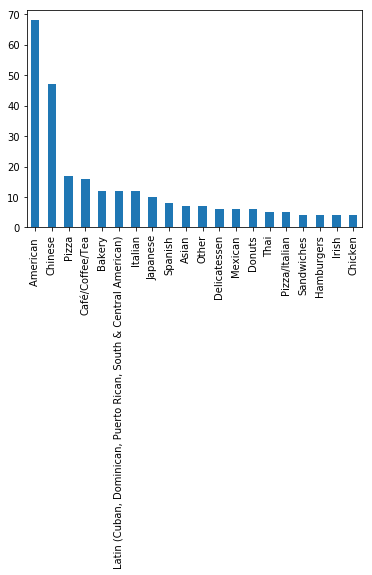

In [26]:
df_unique[df_unique['VIOLATION CODE'].isnull()]['CUISINE DESCRIPTION'] \
                                     .value_counts().head(20).plot(kind='bar')

In [21]:
mask = (df_unique['CUISINE DESCRIPTION'].value_counts() >= 20)
total_cuisine = df_unique['CUISINE DESCRIPTION'].value_counts()[mask]
clean_cuisine = df_unique[df_unique['VIOLATION CODE'].isnull()]['CUISINE DESCRIPTION'] \
                                                     .value_counts()
(clean_cuisine/total_cuisine).dropna().sort_values(ascending = False).head(10)

Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
Other                            0.067961
Irish                            0.057143
Asian                            0.047945
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Chinese                          0.042805
Delicatessen                     0.039216
Name: CUISINE DESCRIPTION, dtype: float64

In [22]:
df_nan = df[df['VIOLATION DESCRIPTION'].notnull() & (df['BORO'] != 'Missing')]
Borouogh_violation = pd.crosstab(df_nan['VIOLATION DESCRIPTION'] , \
                                df['BORO'], \
                                rownames=['Violation'], colnames=['Boough'])
Borouogh_violation.idxmax()

Boough
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

In [23]:
def Violation_Freq(x):
    return (x / Borouogh_violation.T.sum())
Borouogh_violation.apply(Violation_Freq).idxmax()

Boough
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

In [24]:
def get_3digit(x):
    return x[:3]
df['PHONE_3D'] = df['PHONE'].map(get_3digit)
df_init = df[['ZIPCODE','PHONE_3D']].drop_duplicates(subset = ['ZIPCODE','PHONE_3D'])
len(df_init[['ZIPCODE','PHONE_3D']].drop_duplicates(subset = 'PHONE_3D', keep = False))

34

In [25]:
def base_word(x):
    return ' '.join(x.split()[:-1])
def last_word(x):
    return x.split()[-1]
df['STREET TYPE'] = df['STREET'].map(last_word)
df['STREET BASE'] = df['STREET'].map(base_word)
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']
print df['STREET BASE & ZIP']

0              FLATBUSH 11225
1              FLATBUSH 11225
2              FLATBUSH 11225
3              FLATBUSH 11225
4              FLATBUSH 11225
5                    63 11374
6                    63 11374
7                    63 11374
8                    63 11374
9               ASTORIA 11369
10              ASTORIA 11369
11              ASTORIA 11369
12              ASTORIA 11369
13              ASTORIA 11369
14              ASTORIA 11369
15              ASTORIA 11369
16               SUTTER 11208
17               SUTTER 11208
18               SUTTER 11208
19               SUTTER 11208
20               SUTTER 11208
21               SUTTER 11208
22                KINGS 11223
23                KINGS 11223
24               CHURCH 11218
25               CHURCH 11218
26                    3 11209
27                    3 11209
28                    3 11209
29                    3 11209
                 ...         
44603            LINDEN 11411
44604            LINDEN 11411
44605     

In [35]:
df_street = df[['STREET TYPE', 'STREET BASE','STREET BASE & ZIP']] \
                .drop_duplicates(subset = ['STREET TYPE', 'STREET BASE'])
def remove_empty(x):
    return x
    if(x == ''):
        return np.nan
     else:
        return x
df_street_clean = df_street[df_street['STREET BASE'].map(remove_empty).notnull()]
df_street_clean

df_street_clean_merge = df_street_clean.merge(df_street_clean,
                         left_on = 'STREET BASE & ZIP',
                         right_on = 'STREET BASE & ZIP',
                         suffixes = ['_1', '_2'])
df_street_clean_merge = df_street_clean_merge[df_street_clean_merge['STREET TYPE_1'] != df_street_clean_merge['STREET TYPE_2']]

Ave_tab = pd.crosstab(df_street_clean_merge['STREET TYPE_1'],
                      df_street_clean_merge['STREET TYPE_2'],
                      rownames=['STREET TYPE_1'], colnames=['STREET TYPE_2'])
Ave_tab[['AVE','ST','RD', 'PL', 'BOULEARD', 'BULEVARD']].idxmax()


,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
24,AVENUE,CHURCH,CHURCH 11218
26,AVENUE,3,3 11209
30,STREET,EAST 74,EAST 74 10021
31,WEST,PROSPECT PARK,PROSPECT PARK 11215
34,BROADWAY,,10003
